In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
NBA_JT_df = "NbaData1.csv"
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
NBA_JT_df = pd.read_csv(NBA_JT_df, encoding="ISO-8859-1")
# Show just the header
NBA_JT_df.head()

,GameID,Date,City,Country,Home Team,Away Team,attendance,Home Score,Home 1st Q,Home FG%,Home 3pt%,Home FT%,Away Score,Away 1st Q,Away FG%,Away 3pt%,Away FT%
0,4c06f6af-980b-41b3-85c3-5975d8e03956,2018-10-17T00:00:00+00:00,Boston,USA,Boston Celtics,Philadelphia 76ers,18624,105,21,43.3,29.7,71.4,87,21,39.1,19.2,60.9
1,3594f3a2-86b8-4337-83d3-269c078c7f1f,2018-10-17T02:30:00+00:00,Oakland,USA,Golden State Warriors,Oklahoma City Thunder,19596,108,31,44.2,26.9,94.4,100,23,36.3,27.0,64.9
2,24b19539-d496-460a-9e9b-2194d0fcc82a,2018-10-17T23:00:00+00:00,Detroit,USA,Detroit Pistons,Brooklyn Nets,20332,103,24,42.4,25.0,86.4,100,29,48.8,18.5,68.2
3,35a15ba5-77f8-45f5-91a6-79bbc3fbf989,2018-10-17T23:00:00+00:00,Charlotte,USA,Charlotte Hornets,Milwaukee Bucks,17889,112,23,44.6,42.1,63.6,113,36,49.4,41.2,75.0
4,b83e3709-b996-4df3-b448-af91c5566187,2018-10-17T23:00:00+00:00,Indianapolis,USA,Indiana Pacers,Memphis Grizzlies,17923,111,27,56.6,38.5,53.8,83,16,29.8,34.5,82.1


In [3]:
quartiles = NBA_JT_df['attendance'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of occupancy is: 16394.0
The upper quartile of occupancy is: 19432.0
The interquartile range of occupancy is: 3038.0
The the median of occupancy is: 18203.0 
Values below 11837.0 could be outliers.
Values above 23989.0 could be outliers.


In [4]:
# Bins are 0, 59.9, 69.9, 79.9, 89.9, 100.   
bins = [0, 16394, 18203, 19432, 23989]

# Create the names for the five bins
group_names = ["1Q Atten", "2Q Atten", "3Q Atten", "4Q Atten"]

In [5]:
# Slice the data and place it into bins
pd.cut(NBA_JT_df["attendance"], bins, labels=group_names).head()
# Place the data series into a new column inside of the DataFrame
NBA_JT_df["Attendance Group"] = pd.cut(NBA_JT_df["attendance"], bins, labels=group_names)
NBA_JT_df.head()

,GameID,Date,City,Country,Home Team,Away Team,attendance,Home Score,Home 1st Q,Home FG%,Home 3pt%,Home FT%,Away Score,Away 1st Q,Away FG%,Away 3pt%,Away FT%,Attendance Group
0,4c06f6af-980b-41b3-85c3-5975d8e03956,2018-10-17T00:00:00+00:00,Boston,USA,Boston Celtics,Philadelphia 76ers,18624,105,21,43.3,29.7,71.4,87,21,39.1,19.2,60.9,3Q Atten
1,3594f3a2-86b8-4337-83d3-269c078c7f1f,2018-10-17T02:30:00+00:00,Oakland,USA,Golden State Warriors,Oklahoma City Thunder,19596,108,31,44.2,26.9,94.4,100,23,36.3,27.0,64.9,4Q Atten
2,24b19539-d496-460a-9e9b-2194d0fcc82a,2018-10-17T23:00:00+00:00,Detroit,USA,Detroit Pistons,Brooklyn Nets,20332,103,24,42.4,25.0,86.4,100,29,48.8,18.5,68.2,4Q Atten
3,35a15ba5-77f8-45f5-91a6-79bbc3fbf989,2018-10-17T23:00:00+00:00,Charlotte,USA,Charlotte Hornets,Milwaukee Bucks,17889,112,23,44.6,42.1,63.6,113,36,49.4,41.2,75.0,2Q Atten
4,b83e3709-b996-4df3-b448-af91c5566187,2018-10-17T23:00:00+00:00,Indianapolis,USA,Indiana Pacers,Memphis Grizzlies,17923,111,27,56.6,38.5,53.8,83,16,29.8,34.5,82.1,2Q Atten


In [6]:
# Create a GroupBy object based upon "View Group"
NBA_group = NBA_JT_df.groupby("Attendance Group")


# Get the average of each column within the GroupBy object
NBA_group[["Home Score", "Home 1st Q", "Home FG%","Home 3pt%","Home FT%","Away Score","Away 1st Q","Away FG%","Away 3pt%","Away FT%" ]].mean()

,Home Score,Home 1st Q,Home FG%,Home 3pt%,Home FT%,Away Score,Away 1st Q,Away FG%,Away 3pt%,Away FT%
Attendance Group,,,,,,,,,,
1Q Atten,111.366667,27.319048,46.491905,35.728571,76.039524,109.395238,27.485714,46.050000,34.977143,76.146667
2Q Atten,113.281106,28.534562,46.672811,35.997235,76.283410,109.327189,27.543779,45.607373,34.820737,75.562212
3Q Atten,111.148325,28.081340,46.653589,36.555502,77.881818,108.411483,26.956938,45.337799,35.169378,77.591866
4Q Atten,112.534653,28.801980,46.817327,35.495545,76.652475,109.500000,28.059406,45.531188,35.398515,76.599505


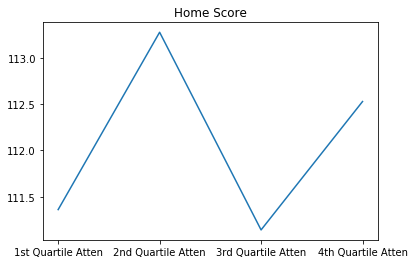

In [7]:
x = ["1st Quartile Atten", "2nd Quartile Atten", "3rd Quartile Atten", "4th Quartile Atten"]
y = [111.36, 113.28, 111.14, 112.53]
plt.plot(x, y)
plt.title("Home Score")
plt.savefig("../HomeScore.png")

In [ ]:
x = ["1st Quartile Atten", "2nd Quartile Atten", "3rd Quartile Atten", "4th Quartile Atten"]
y = [27.32, 28.53, 28.08, 28.80]
plt.plot(x, y)
plt.title("Home Team Points in the 1st Quarter")
plt.savefig("../Home_1stQ_points.png")

In [ ]:
x = ["1st Quartile Atten", "2nd Quartile Atten", "3rd Quartile Atten", "4th Quartile Atten"]
y = [46.49, 46.67, 46.65, 46.81]
plt.plot(x, y)
plt.title("Home Team FG %")
plt.savefig("../HomeFG%.png")

In [ ]:
x = ["1st Quartile Atten", "2nd Quartile Atten", "3rd Quartile Atten", "4th Quartile Atten"]
y = [35.72, 35.99, 36.55, 35.49]
plt.plot(x, y)
plt.title("Home Team 3pt %")
plt.savefig("../Home3pt%.png")

In [ ]:
x = ["1st Quartile Atten", "2nd Quartile Atten", "3rd Quartile Atten", "4th Quartile Atten"]
y = [76.04, 76.28, 77.88, 76.65]
plt.plot(x, y)
plt.title("Home Team Free Throw %")
plt.savefig("../HomeFT%.png")

In [ ]:
x = ["1st Quartile Atten", "2nd Quartile Atten", "3rd Quartile Atten", "4th Quartile Atten"]
y = [76.04, 76.28, 77.88, 76.65]
plt.plot(x, y)
plt.title("Home Team Free Throw %")

In [ ]:
x = ["1st Quartile Atten", "2nd Quartile Atten", "3rd Quartile Atten", "4th Quartile Atten"]
y = [109.39, 109.33, 108.41, 109.50]
plt.plot(x, y)
plt.title("Away Team Score")
plt.savefig("../AwayScore.png")

In [ ]:
x = ["1st Quartile Atten", "2nd Quartile Atten", "3rd Quartile Atten", "4th Quartile Atten"]
y = [27.49, 27.54, 26.96, 28.06]
plt.plot(x, y)
plt.title("Away Team Points in the 1st Quarter")
plt.savefig("../Away_1stQ_points.png")

In [ ]:
x = ["1st Quartile Atten", "2nd Quartile Atten", "3rd Quartile Atten", "4th Quartile Atten"]
y = [46.05, 45.61, 45.34, 45.53]
plt.plot(x, y)
plt.title("Away Team FG %")
plt.savefig("../AwayFG%.png")

In [ ]:
x = ["1st Quartile Atten", "2nd Quartile Atten", "3rd Quartile Atten", "4th Quartile Atten"]
y = [34.98, 34.82, 35.17, 35.40]
plt.plot(x, y)
plt.title("Away Team 3pt %")
plt.savefig("../Away3pt%.png")

In [ ]:
x = ["1st Quartile Atten", "2nd Quartile Atten", "3rd Quartile Atten", "4th Quartile Atten"]
y = [76.15, 75.57, 77.60, 76.60]
plt.plot(x, y)
plt.title("Away Team Free Throw %")
plt.savefig("../AwayFT%.png")

In [10]:
home_team_stats = NBA_JT_df.groupby(["Home Team"])

AvgAtten = home_team_stats["attendance"].mean()

home_score =  home_team_stats["Home Score"].mean()
away_score =  home_team_stats["Away Score"].mean()

FG_percent = home_team_stats["Home FG%"].mean()
away_FG_percent = home_team_stats["Away FG%"].mean()

FT_percent = home_team_stats["Home FT%"].mean()
away_FT_percent = home_team_stats["Away FT%"].mean()

ThreePT_percent = home_team_stats["Home 3pt%"].mean()
Away_ThreePT_percent = home_team_stats["Away 3pt%"].mean()

FG_percent = home_team_stats["Home FG%"].mean()
away_FG_percent = home_team_stats["Away FG%"].mean()

FT_percent = home_team_stats["Home FT%"].mean()
away_FT_percent = home_team_stats["Away FT%"].mean()

ThreePT_percent = home_team_stats["Home 3pt%"].mean()
Away_ThreePT_percent = home_team_stats["Away 3pt%"].mean()


HomeTeam_df = pd.DataFrame({
    "Avg Attendance": AvgAtten,
    "PPG at Home": home_score,
    "Field Goal Percentage": FG_percent,
    "3 PT Percentage": ThreePT_percent,
    "Free Throw Percentage": FT_percent,
    "Away Team PPG": away_score,
    "Away Field Goal Percentage":away_FG_percent,
    "Away 3 PT Percentage":Away_ThreePT_percent,
    "Away Free Throw Perentage":away_FT_percent
    
})
HomeTeam_df

,Avg Attendance,PPG at Home,Field Goal Percentage,3 PT Percentage,Free Throw Percentage,Away Team PPG,Away Field Goal Percentage,Away 3 PT Percentage,Away Free Throw Perentage
Home Team,,,,,,,,,
Atlanta Hawks,15100.916667,111.666667,46.120833,33.975000,75.058333,118.375000,47.220833,35.300000,77.316667
Boston Celtics,18624.000000,115.633333,47.813333,37.550000,82.286667,106.000000,43.650000,34.120000,75.500000
Brooklyn Nets,14407.466667,114.900000,45.766667,36.710000,75.416667,113.700000,46.980000,34.490000,76.153333
Charlotte Hornets,15993.821429,113.250000,46.571429,37.221429,79.275000,107.571429,45.375000,34.482143,76.921429
Chicago Bulls,19873.592593,102.481481,44.844444,34.548148,78.307407,112.629630,48.085185,36.437037,76.144444
Cleveland Cavaliers,19432.000000,102.703704,44.529630,35.062963,79.766667,112.111111,49.522222,39.285185,77.696296
Dallas Mavericks,19916.392857,110.714286,45.910714,35.528571,74.092857,106.071429,45.057143,33.392857,76.650000
Denver Nuggets,18343.703704,116.481481,49.562963,36.870370,78.666667,104.481481,46.059259,33.048148,72.274074
Detroit Pistons,15731.620690,108.000000,44.551724,33.524138,75.637931,107.000000,46.958621,32.627586,73.668966


In [11]:
A_df = HomeTeam_df.sort_values(by='Avg Attendance', ascending=True)
A_df

,Avg Attendance,PPG at Home,Field Goal Percentage,3 PT Percentage,Free Throw Percentage,Away Team PPG,Away Field Goal Percentage,Away 3 PT Percentage,Away Free Throw Perentage
Home Team,,,,,,,,,
Brooklyn Nets,14407.466667,114.900000,45.766667,36.710000,75.416667,113.700000,46.980000,34.490000,76.153333
Phoenix Suns,14946.724138,105.896552,46.103448,34.872414,76.489655,113.068966,47.965517,35.582759,75.031034
Atlanta Hawks,15100.916667,111.666667,46.120833,33.975000,75.058333,118.375000,47.220833,35.300000,77.316667
Minnesota Timberwolves,15105.888889,113.000000,45.685185,35.892593,78.366667,108.296296,44.918519,34.966667,73.659259
Memphis Grizzlies,15343.428571,100.642857,45.525000,31.107143,74.696429,100.750000,43.939286,34.732143,77.814286
Detroit Pistons,15731.620690,108.000000,44.551724,33.524138,75.637931,107.000000,46.958621,32.627586,73.668966
New Orleans Pelicans,15744.115385,117.346154,48.019231,34.957692,77.688462,113.115385,46.803846,36.780769,74.750000
Charlotte Hornets,15993.821429,113.250000,46.571429,37.221429,79.275000,107.571429,45.375000,34.482143,76.921429
Indiana Pacers,16789.821429,108.571429,47.692857,37.421429,73.553571,98.857143,43.050000,34.135714,75.371429


In [12]:
x = A_df["Avg Attendance"]
xx = A_df["PPG at Home"]

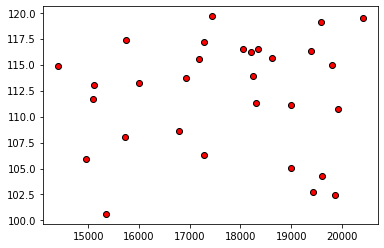

In [13]:
plt.scatter(x, xx, marker="o", facecolors="red", edgecolors="black")

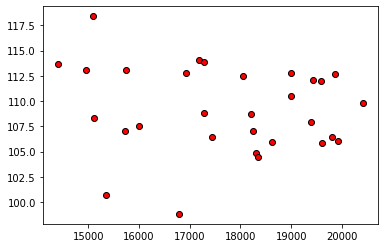

In [15]:
x = A_df["Avg Attendance"]
y= A_df["Away Team PPG"]
plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black")

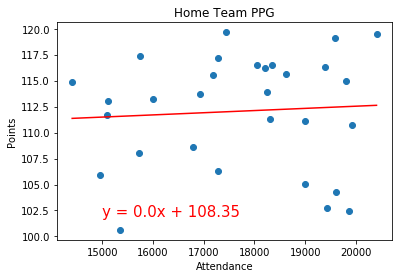

<Figure size 432x288 with 0 Axes>

In [37]:
x_values = A_df["Avg Attendance"]
y_values = A_df["PPG at Home"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15000,102),fontsize=15,color="red")
plt.xlabel('Attendance')
plt.ylabel('Points')
plt.title("Home Team PPG")
plt.show()
plt.savefig("../HomeTeamAvgPPG.png")

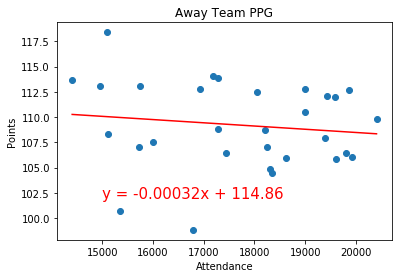

In [36]:
x_values = A_df["Avg Attendance"]
y_values = A_df["Away Team PPG"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15000,102),fontsize=15,color="red")
plt.xlabel('Attendance')
plt.ylabel("Points")
plt.title('Away Team PPG')
plt.show()

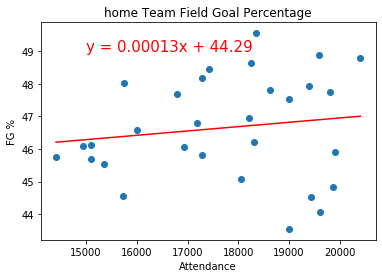

<Figure size 432x288 with 0 Axes>

In [33]:
x_values = A_df["Avg Attendance"]
y_values = A_df["Field Goal Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15000,49),fontsize=15,color="red")
plt.xlabel('Attendance')
plt.ylabel('FG %')
plt.title("home Team Field Goal Percentage")
plt.show()
plt.savefig("../HomeTeamFG5.png")

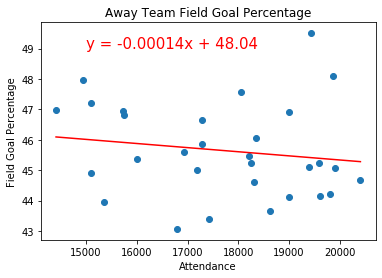

In [28]:
x_values = A_df["Avg Attendance"]
y_values = A_df["Away Field Goal Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15000,49),fontsize=15,color="red")
plt.xlabel('Attendance')
plt.ylabel('Field Goal Percentage')
plt.title('Away Team Field Goal Percentage')
plt.show()


In [ ]:
x_values = A_df["Avg Attendance"]
y_values = A_df["3 PT Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15000,40),fontsize=15,color="red")
plt.xlabel('Attendance')
plt.ylabel('3 PT Percentage at Home')
plt.show()
plt.savefig("../HomeTeam3pt.png")

In [ ]:
x_values = A_df["Avg Attendance"]
y_values = A_df["Free Throw Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15000,70),fontsize=15,color="red")
plt.xlabel('Attendance')
plt.ylabel('Free Throw Percentageat Home')
plt.show()
# plt.savefig("../HomeTeamFT%.png")